In [29]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## Import Data

In [2]:
with open("./data.csv", "r") as f:
        df = pd.read_csv(f)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

<AxesSubplot:title={'center':'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

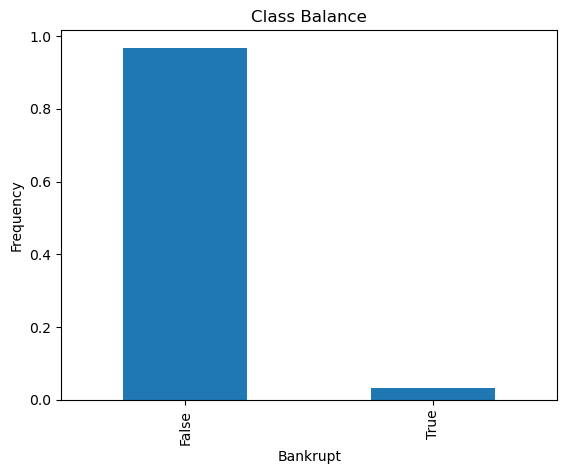

In [4]:
df["Bankrupt?"] = df["Bankrupt?"].astype(bool)
df["Bankrupt?"].value_counts(normalize=True).plot(
    kind = "bar",
    xlabel= "Bankrupt",
    ylabel = "Frequency",
    title = "Class Balance"
)

C:\Users\jigme\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 30652 (\N{CJK UNIFIED IDEOGRAPH-77BC}) missing from current font.
  fig.canvas.draw()
C:\Users\jigme\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 30652 (\N{CJK UNIFIED IDEOGRAPH-77BC}) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]


<AxesSubplot:>

C:\Users\jigme\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30652 (\N{CJK UNIFIED IDEOGRAPH-77BC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


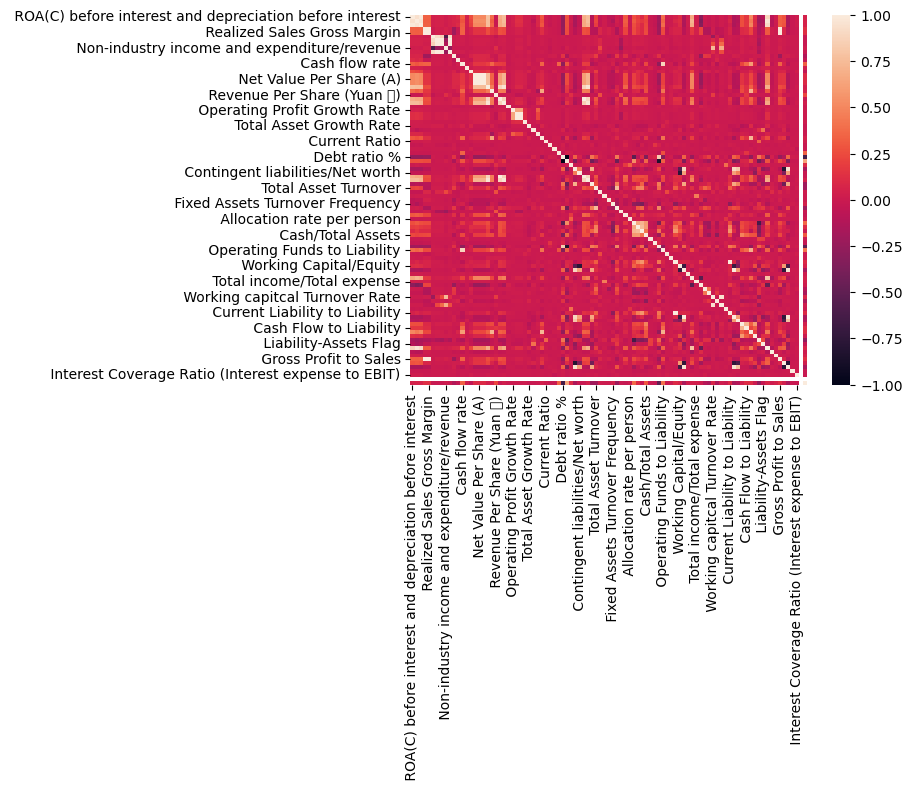

In [6]:
corr = df.drop(columns="Bankrupt?").corr()
sns.heatmap(corr)

we can tell from the "Class Balance" bar chart, the class is imbalance, and the confusion matrix shows that the dataset has autocorreslation issues.

## split

In [7]:
target = "Bankrupt?"
X = df.drop(columns = target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


Try undersampler and oversampler, since there are imbalance classes.

In [8]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print("X_train_under shape:",X_train_under.shape)
X_train_under.head()

X_train_under shape: (338, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.547409,0.597580,0.583757,0.604707,0.604707,0.999089,0.797593,0.809456,0.303629,0.781726,...,0.831586,0.001479,0.624287,0.604706,0.842928,0.279743,0.026801,0.565205,1,0.029354
1,0.575196,0.622928,0.609187,0.606142,0.606142,0.999085,0.797859,0.809654,0.304102,0.781934,...,0.845096,0.001891,0.624553,0.606139,0.843117,0.277089,0.026791,0.565159,1,0.050445
2,0.490567,0.552933,0.539483,0.629665,0.629520,0.999108,0.797607,0.809484,0.303613,0.781755,...,0.810341,0.001115,0.624214,0.629664,0.840741,0.275084,0.026791,0.565158,1,0.250781
3,0.543899,0.598779,0.593180,0.602740,0.602754,0.999041,0.797495,0.809399,0.303559,0.781664,...,0.828565,0.001621,0.623379,0.602735,0.843240,0.282201,0.026865,0.565489,1,0.023104
4,0.608980,0.658689,0.655174,0.612491,0.613183,0.999193,0.798374,0.810111,0.304774,0.782440,...,0.867959,0.010567,0.621156,0.612491,0.843773,0.275537,0.026791,0.565158,1,0.123342


In [9]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


For the autocorreslation issues, here used RandomForestClassifier/ decisiontreeclassifier instead of linear models.

## Building Model

In [49]:
# Fit on `X_train`, `y_train`
model_reg = RandomForestClassifier(random_state=42)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = RandomForestClassifier(random_state=42)
model_over.fit(X_train_over, y_train_over)

# Fit on `X_train_over`, `y_train_over` with DecisionTreeClassifier
model_dover = DecisionTreeClassifier(random_state=42)
model_dover.fit(X_train_over, y_train_over)

# Fit on `X_train_over`, `y_train_over` with DecisionTreeClassifier
model_dreg = DecisionTreeClassifier(random_state=42)
model_dreg.fit(X_train, y_train)

for m in [model_reg, model_under, model_over, model_dover, model_dreg]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))


Training Accuracy: 1.0
Test Accuracy: 0.9677
Training Accuracy: 0.8678
Test Accuracy: 0.8541
Training Accuracy: 1.0
Test Accuracy: 0.9677
Training Accuracy: 1.0
Test Accuracy: 0.9604
Training Accuracy: 1.0
Test Accuracy: 0.9531


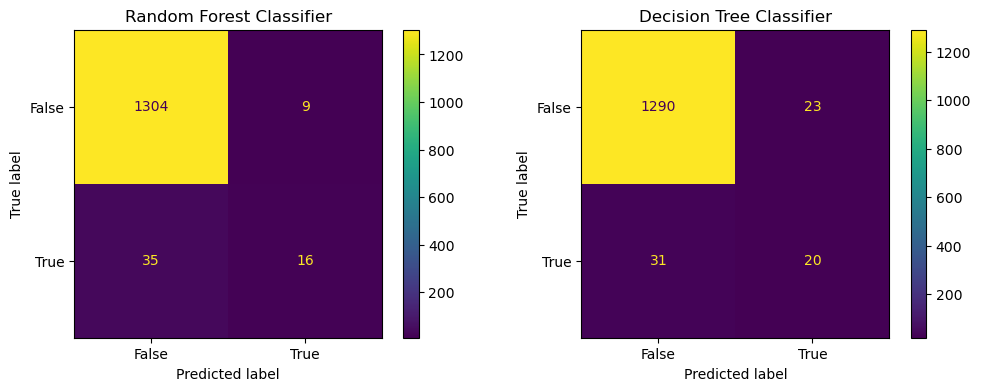

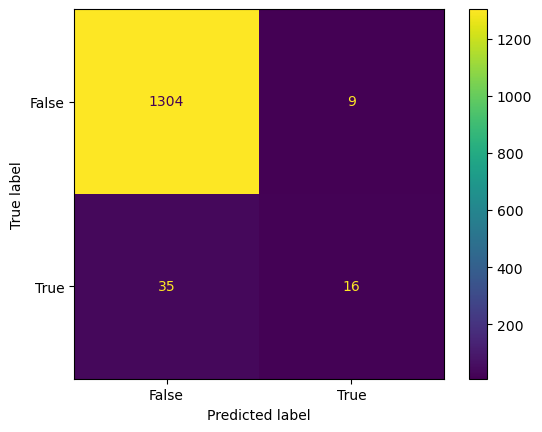

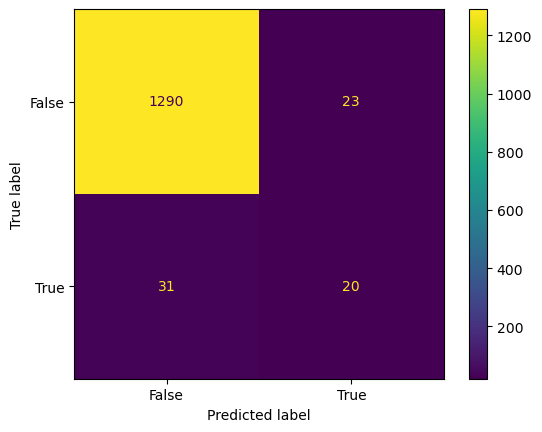

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test).plot(ax=ax1)
ConfusionMatrixDisplay.from_estimator(model_dover, X_test, y_test).plot(ax=ax2)
ax1.set_title('Random Forest Classifier')
ax2.set_title('Decision Tree Classifier')
plt.show()

In [36]:
params = {
    "n_estimators": range(25,100,25),
    "max_depth":range(10,50,10)
}
model = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    cv=5,
    n_jobs = -1,
    verbose=1
)

model.fit(X_train_over, y_train_over)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [35]:
params = {
    "max_depth":range(10,50,10)
}
model_d = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,
    n_jobs = -1,
    verbose=1
)

model_d.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10)}, verbose=1)

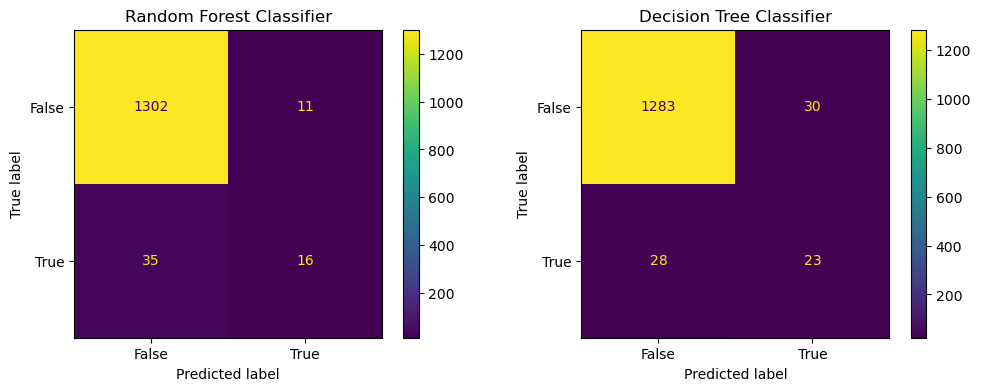

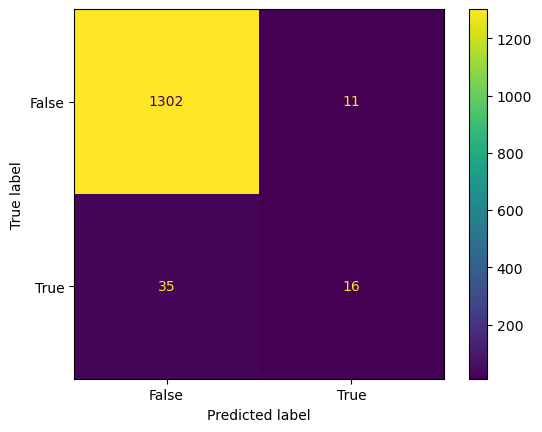

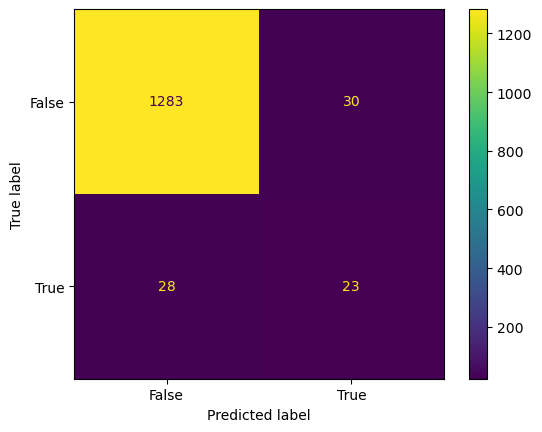

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test).plot(ax=ax1)
ConfusionMatrixDisplay.from_estimator(model_d, X_test, y_test).plot(ax=ax2)
ax1.set_title('Random Forest Classifier')
ax2.set_title('Decision Tree Classifier')
plt.show()

## Report

In [42]:
# Generate predictions--Randomforest
y_test_pred = model.predict(X_test)
# Put predictions into Series with name "bankrupt", and same index as X_test
y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1313
        True       0.59      0.31      0.41        51

    accuracy                           0.97      1364
   macro avg       0.78      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



In [43]:
# Generate predictions--Decisiontree
y_test_pred = model_d.predict(X_test)
# Put predictions into Series with name "bankrupt", and same index as X_test
y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1313
        True       0.43      0.45      0.44        51

    accuracy                           0.96      1364
   macro avg       0.71      0.71      0.71      1364
weighted avg       0.96      0.96      0.96      1364



A real company case:
I tested the company with this model, and the stock price did bounce back!

In [46]:
with open("./check.csv", encoding="utf-8") as f:
    df1 = pd.read_csv(f)
y_check = model_d.predict(df1.drop(columns="Bankrupt?"))
print(y_check)

[False]
